C:\Users\Nima\AppData\Local\Temp\ipykernel_17872\1549772392.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv('Dataframe.csv', parse_dates=['date'], index_col='date')
C:\Users\Nima\AppData\Local\Temp\ipykernel_17872\1549772392.py:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].interpolate(inplace=True)
C:\Users\Nima\anaconda3\Lib\site-packages\statsmodels\ts

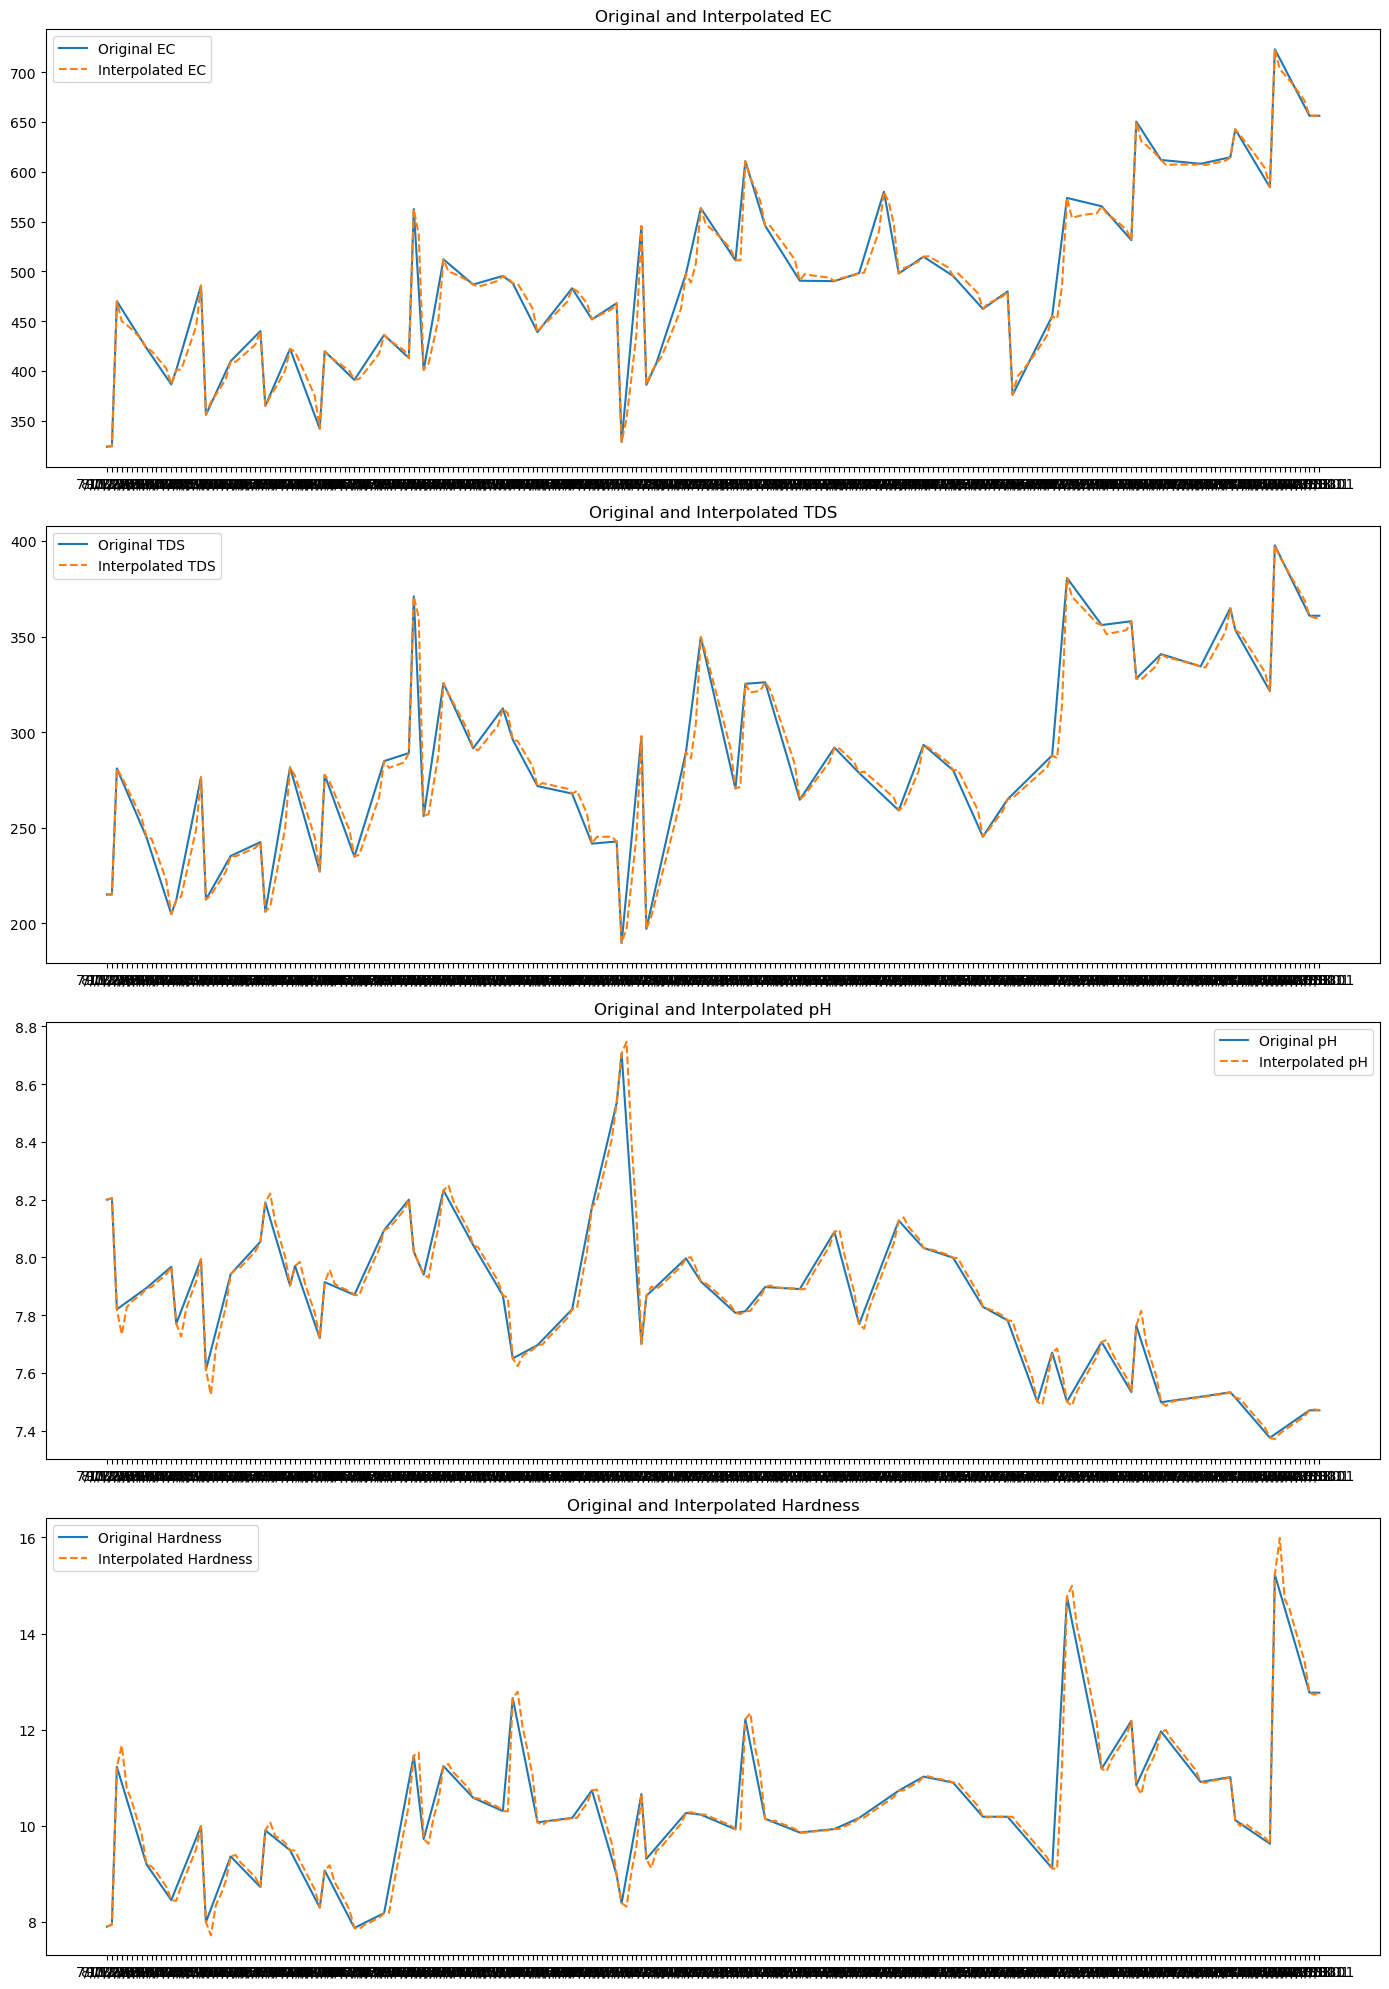

In [52]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv('Dataframe.csv', parse_dates=['date'], index_col='date')

# List of columns to process
columns_to_interpolate = ['EC', 'TDS', 'pH', 'Hardness']

# Define ARIMA order
p, d, q = 1, 1, 1

# Create a copy of the original data to plot later
original_df = df.copy()

# Iterate over each column
for column in columns_to_interpolate:
    # Temporarily fill missing values to fit the ARIMA model
    df[column].interpolate(inplace=True)
    
    # Fit the ARIMA model
    model = ARIMA(df[column], order=(p, d, q))
    model_fit = model.fit()
    
    # Identify and interpolate missing values
    missing_indices = original_df[original_df[column].isna()].index
    for idx in missing_indices:
        original_df.at[idx, column] = model_fit.predict(start=idx, end=idx)[0]

# Save the interpolated DataFrame to a new CSV file
original_df.to_csv('Interpolated_Dataframe_ARIMA.csv')

# Plot each column individually
plt.figure(figsize=(14, 20))

for i, column in enumerate(columns_to_interpolate, 1):
    plt.subplot(len(columns_to_interpolate), 1, i)
    plt.plot(df.index, df[column], label=f'Original {column}')
    plt.plot(original_df.index, original_df[column], label=f'Interpolated {column}', linestyle='--')
    plt.legend()
    plt.title(f'Original and Interpolated {column}')

plt.tight_layout()
plt.show()
